Classical solution to the NLS equation via the spli-operator method.<br><br>
$
i\, \partial_t\, \psi(x,t) = \Bigl( - \Delta + V(x)\, + \kappa \,|\psi(x,t)|^2\, \Bigr)\, \psi(x,t)
$
<br>

Initial L2 norm: 1.000000


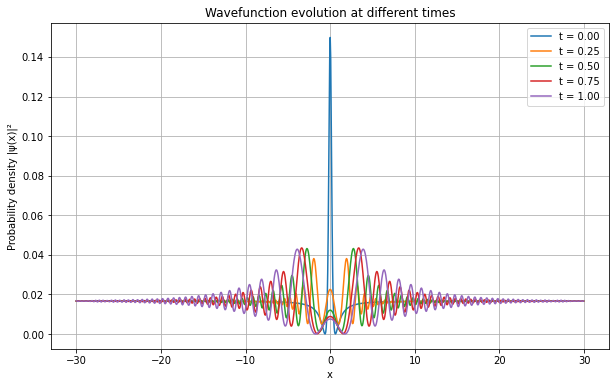

Final L2 norm of the wavefunction: 1.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
L = 60.0                # Spatial domain size
N = 1024                # Number of spatial grid points
dx = L / N              # Spatial resolution
x = np.linspace(-L/2, L/2, N, endpoint=False)  # spatial grid

# Negative coupling k: focusing
# Positive coupling k: defocusing
kappa = -2

dt = 1/16               # Time step
total_time = 1.0     # Total simulation time
num_steps = int(total_time / dt)

# Save every plot_interval time steps
plot_interval = 4
steps_per_snapshot = num_steps // plot_interval

# Define Fourier space grid for kinetic evolution
dk = 2 * np.pi / L
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi  # wave numbers

# Define potential V(x) and nonlinearity function f(|psi|^2)
def V(x):
    # Example: constant potential (V(x)=0)
    return 0

def nonlinearity(psi):
    # Nonlinearity: (k|ψ|²)
    return kappa*(np.abs(psi)**2)





# Initial condition: Gaussian wavepacket (example)
# psi = np.exp(-x**2).astype(np.complex128)

# Initial condition as in QTT example: breather
a = 0.01
param = 0.1/a
HH = np.sqrt(2)*x*(param**2)*a
psi = a*(-1+4/(1+4*(HH**2))).astype(np.complex128)

# Define the initial bright soliton wavefunction
# eta = 1.0       # Controls amplitude and width of the soliton
# v = 0.0         # Velocity (stationary soliton)
# x0 = 0.0        # Initial center position
# phi0 = 0.0      # Initial phase

# psi = eta * np.cosh(eta * (x - x0))**(-1) * np.exp(1j * phi0)

initial_norm = np.sqrt(np.sum(np.abs(psi)**2) * dx)
psi /= initial_norm
print(f"Initial L2 norm: {np.sqrt(np.sum(np.abs(psi)**2) * dx):.6f}")


# Precompute the potential half-step operator coefficients (for efficiency)
def half_step_potential_operator(psi_current, half_dt):
    phase = -1j * (V(x) + nonlinearity(psi_current)) * half_dt
    return np.exp(phase)

# Precompute kinetic operator for full step
# Time evolution for -Δ operator, as: FT(Laplace op) = -(|k|^2)
kinetic_operator = np.exp(-1j * (k**2) * dt)

# Prepare to store snapshots
snapshots = []       # list to store copies of psi at snapshot times
snapshot_times = []  # list to store corresponding times

# Store the initial condition as the first snapshot
snapshots.append(np.copy(psi))
snapshot_times.append(0.0)

# Time evolution loop using Strang splitting
half_dt = dt / 2.0
current_time = 0.0
for step in range(num_steps):
    # First half-step potential and nonlinearity
    psi *= half_step_potential_operator(psi, half_dt)
    
    # Full-step kinetic evolution in Fourier space
    psi_hat = np.fft.fft(psi)
    psi_hat *= kinetic_operator
    psi = np.fft.ifft(psi_hat)
    
    # Second half-step potential and nonlinearity
    psi *= half_step_potential_operator(psi, half_dt)
    
    # Increment time
    current_time += dt
    
    # Save snapshot at specified intervals
    if (step + 1) % steps_per_snapshot == 0:
        snapshots.append(np.copy(psi))
        snapshot_times.append(current_time)

# Plotting snapshots including the initial condition
plt.figure(figsize=(10, 6))
for idx, snapshot in enumerate(snapshots):
    plt.plot(x, np.abs(snapshot)**2, label=f't = {snapshot_times[idx]:.2f}')

plt.xlabel('x')
plt.ylabel('Probability density |ψ(x)|²')
plt.title('Wavefunction evolution at different times')
plt.legend()
plt.grid(True)
plt.show()

# Compute and print final norm to verify conservation
final_norm = np.sqrt(np.sum(np.abs(psi)**2) * dx)
print(f"Final L2 norm of the wavefunction: {final_norm:.6f}")


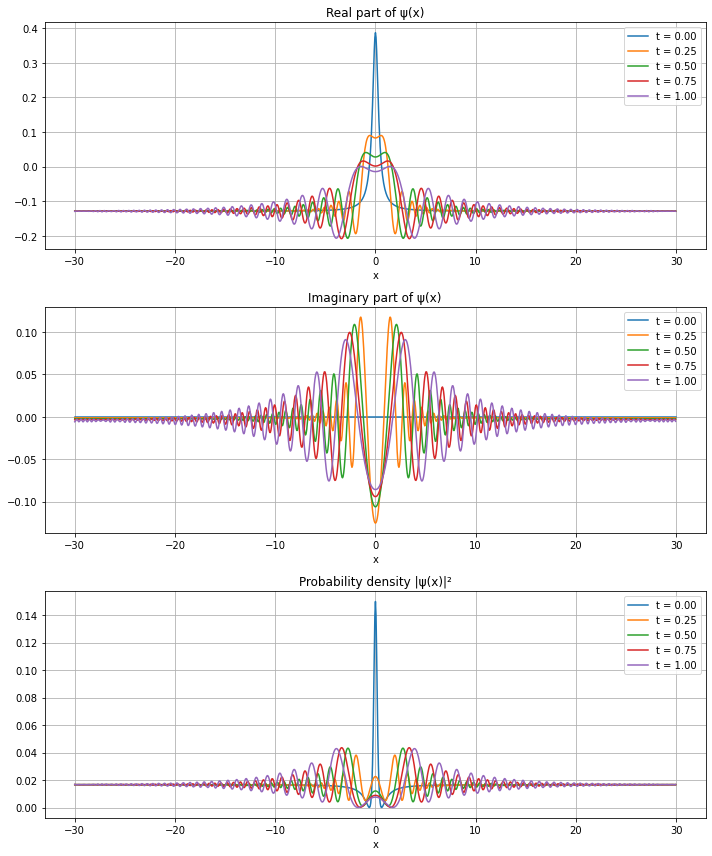

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
L = 60.0                # Spatial domain size
N = 1024                # Number of spatial grid points
dx = L / N              # Spatial resolution
x = np.linspace(-L/2, L/2, N, endpoint=False)  # spatial grid

# Negative coupling k: focusing
# Positive coupling k: defocusing
kappa = -2

dt = 1/16               # Time step
total_time = 1.0     # Total simulation time
num_steps = int(total_time / dt)

# Save every plot_interval time steps
plot_interval = 4
steps_per_snapshot = num_steps // plot_interval

# Define Fourier space grid for kinetic evolution
dk = 2 * np.pi / L
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi  # wave numbers

# Define potential V(x) and nonlinearity function f(|psi|^2)
def V(x):
    return 0

def nonlinearity(psi):
    return kappa*(np.abs(psi)**2)

# Initial condition as in QTT example: breather
a = 0.01
param = 0.1/a
HH = np.sqrt(2)*x*(param**2)*a
psi = a*(-1+4/(1+4*(HH**2))).astype(np.complex128)

# Normalize initial wavefunction
initial_norm = np.sqrt(np.sum(np.abs(psi)**2) * dx)
psi /= initial_norm

# Precompute potential operator
def half_step_potential_operator(psi_current, half_dt):
    phase = -1j * (V(x) + nonlinearity(psi_current)) * half_dt
    return np.exp(phase)

# Precompute kinetic operator for full step
kinetic_operator = np.exp(-1j * (k**2) * dt)

# Prepare to store snapshots
snapshots = []
snapshot_times = []

# Store the initial condition as the first snapshot
snapshots.append(np.copy(psi))
snapshot_times.append(0.0)

# Time evolution loop using Strang splitting
half_dt = dt / 2.0
current_time = 0.0
for step in range(num_steps):
    # First half-step potential and nonlinearity
    psi *= half_step_potential_operator(psi, half_dt)
    
    # Full-step kinetic evolution in Fourier space
    psi_hat = np.fft.fft(psi)
    psi_hat *= kinetic_operator
    psi = np.fft.ifft(psi_hat)
    
    # Second half-step potential and nonlinearity
    psi *= half_step_potential_operator(psi, half_dt)
    
    # Increment time
    current_time += dt
    
    # Save snapshot at specified intervals
    if (step + 1) % steps_per_snapshot == 0:
        snapshots.append(np.copy(psi))
        snapshot_times.append(current_time)

# Plotting snapshots with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for idx, snapshot in enumerate(snapshots):
    # Real part
    axes[0].plot(x, snapshot.real, label=f't = {snapshot_times[idx]:.2f}')
    
    # Imaginary part
    axes[1].plot(x, snapshot.imag, label=f't = {snapshot_times[idx]:.2f}')
    
    # Probability density
    axes[2].plot(x, np.abs(snapshot)**2, label=f't = {snapshot_times[idx]:.2f}')

# Labels and titles
axes[0].set_title('Real part of ψ(x)')
axes[1].set_title('Imaginary part of ψ(x)')
axes[2].set_title('Probability density |ψ(x)|²')

for ax in axes:
    ax.set_xlabel('x')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
